# Prueba de la modificación a appy_GEO_filters()


In [80]:
import pandas as pd 

In [81]:
def plot_species_dist(data, rel):
    ext = pd.merge(data,rel)
    print(f"n = {ext.shape[0]}")
    ext["Specie"].value_counts().plot(kind="barh")

def plot_raw_filtered(data, raw, rel):
    x_raw = pd.DataFrame(pd.merge(raw, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":"RawCounts", "index":"Specie"})
    x_data = pd.DataFrame(pd.merge(data,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":"FilteredCounts", "index":"Specie"})
    pd.merge(x_raw, x_data).set_index("Specie").plot(kind="barh")

## Rank = specie

In [31]:
sp_data = pd.read_csv("./run2/230927SpecieTxIdTest.tsv", sep="\t")
sp_rel = pd.read_csv("./run2/taxonomyRelation_230927SpecieTxIdTest.tsv", sep="\t")
sp_raw = pd.read_csv("./run2/raw_230927SpecieTxIdTest.tsv", sep="\t")

n = 9081


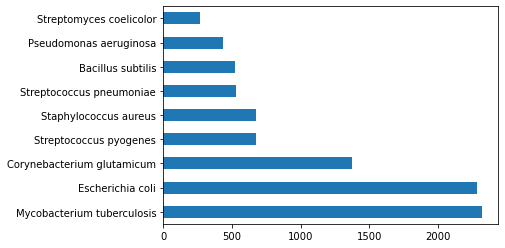

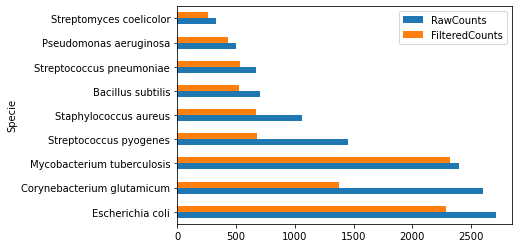

In [32]:
plot_species_dist(sp_data, sp_rel)
plot_raw_filtered(sp_data, sp_raw, sp_rel)

## Rank = "sameTaxid"

In [91]:
sa_data = pd.read_csv("../230927FilterSameTaxid/230927SameTxIdTest.tsv", sep="\t")
sa_rel = pd.read_csv("../230927FilterSameTaxid/taxonomyRelationsFunction2.tsv", sep="\t")
sa_raw = pd.read_csv("../230927FilterSameTaxid/raw_230927SameTxIdTest.tsv", sep="\t")

n = 6553


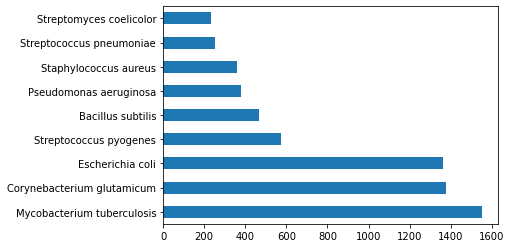

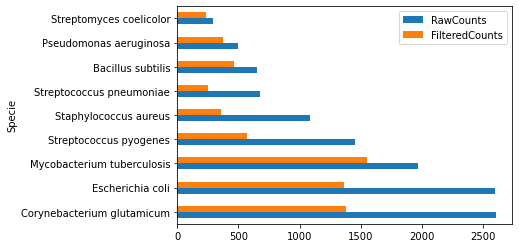

In [84]:
plot_species_dist(sa_data, sa_rel)
plot_raw_filtered(sa_data, sa_raw, sp_rel)

In [73]:
mini = pd.merge(sa_data[["TaxId", "GSM_taxid_ch1", "GPL_taxid", "GSM_geo_accession"]], sa_rel[["TaxId", "ScientificName"]])

In [79]:
mini[mini['TaxId'] == 196627].to_csv('coryne_mini.tsv', sep='\t')

In [53]:
micro = pd.merge(pd.DataFrame(sa_data.GSM_taxid_ch1), sa_rel[["TaxId", "ScientificName"]].rename(columns={"ScientificName":"Name_ch1", "TaxId" : "GSM_taxid_ch1"})).drop_duplicates()

In [71]:
micro

,GSM_taxid_ch1,Name_ch1
0,224308,Bacillus subtilis subsp. subtilis str. 168
264,196627,Corynebacterium glutamicum ATCC 13032
387,511145,Escherichia coli str. K-12 substr. MG1655
1417,405955,Escherichia coli APEC O1
1421,364106,Escherichia coli UTI89
1429,331111,Escherichia coli O139:H28 str. E24377A
1473,316385,Escherichia coli str. K-12 substr. DH10B
1479,199310,Escherichia coli CFT073
1548,83332,Mycobacterium tuberculosis H37Rv
3095,208964,Pseudomonas aeruginosa PAO1


In [57]:
nano = mini[mini.TaxId != mini.GSM_taxid_ch1].drop_duplicates().merge(micro)

In [59]:
nano.TaxId = nano.TaxId.astype("str")
nano[nano.TaxId != nano.GPL_taxid]

,TaxId,GSM_taxid_ch1,GPL_taxid,ScientificName,Name_ch1
1,224308,1423,562;224308,Bacillus subtilis subsp. subtilis str. 168,Bacillus subtilis
11,196620,1280,777;783;83560;115711;176279;176280;196620;2243...,Staphylococcus aureus subsp. aureus MW2,Staphylococcus aureus
13,158878,1280,1280;93061;93062;158878;158879;196620;282458;2...,Staphylococcus aureus subsp. aureus Mu50,Staphylococcus aureus
16,158878,93061,1280;93061;93062;158878;158879;196620;282458;2...,Staphylococcus aureus subsp. aureus Mu50,Staphylococcus aureus subsp. aureus NCTC 8325


In [70]:
sa_data[sa_data.GPL_taxid == nano.loc[16, "GPL_taxid"]][["TaxId", "GSM_taxid_ch1"]].merge(micro).merge(mini[["TaxId", "ScientificName"]].drop_duplicates()).to_csv("./run2/falsePositiveSameTaxID.tsv", sep="\t", header=True, index=False)

## Filtrado anterior

n = 6553


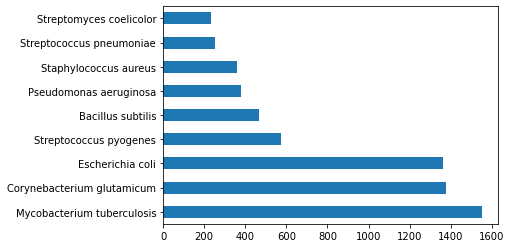

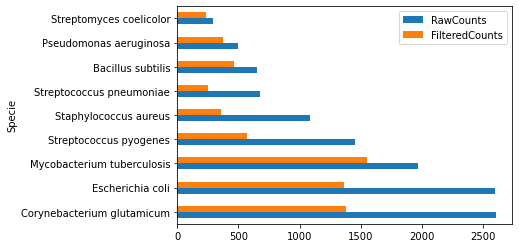

In [90]:
an_data = pd.read_csv("../230903MultiPrEstable/tests/230903Test.tsv", sep="\t").rename(columns={"taxonID":"TaxId"})
an_rel = pd.read_csv("../230903MultiPrEstable/tests/taxonomy_relations_mini.tsv", sep="\t").rename(columns={"ScientificNameSpecie":"Specie"})
an_raw = pd.read_csv("../230827FilterFunc/bigprueba/27082023Test.tsv", sep="\t").rename(columns={"taxonID":"TaxId"})
plot_species_dist(sa_data, sa_rel)
plot_raw_filtered(sa_data, sa_raw, sp_rel)

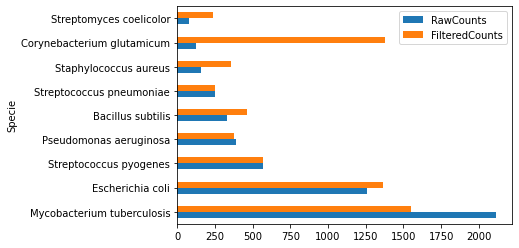

In [88]:
plot_raw_filtered(sa_data, an_data, sa_rel)

In [105]:
sa_rel[sa_rel["Specie"] == "Mycobacterium tuberculosis"]

,Unnamed: 0,TaxId,Rank,Specie,ScientificName
21,21,1773,species group,Mycobacterium tuberculosis,Mycobacterium tuberculosis
31,31,83332,species,Mycobacterium tuberculosis,Mycobacterium tuberculosis H37Rv
53,53,33892,biotype,Mycobacterium tuberculosis,Mycobacterium tuberculosis variant bovis BCG
64,64,419947,species,Mycobacterium tuberculosis,Mycobacterium tuberculosis H37Ra
75,75,652616,species,Mycobacterium tuberculosis,Mycobacterium tuberculosis str. Erdman = ATCC ...
80,80,1765,species,Mycobacterium tuberculosis,Mycobacterium tuberculosis variant bovis
100,100,83331,species,Mycobacterium tuberculosis,Mycobacterium tuberculosis CDC1551


In [100]:
with open('../../data/abasy.txt') as file:
    d = [int(i.rstrip('\n')) for i in file.readlines()]

sa_rel[sa_rel["Specie"] == "Mycobacterium tuberculosis"]['TaxId'].isin(d)


21     False
31      True
53     False
64     False
75     False
80     False
100    False
Name: TaxId, dtype: bool

In [117]:
len(set(an_data[an_data['TaxId'] == 83332]['GSM_geo_accession'].to_list())^ set(sa_data[sa_data['TaxId'] == 83332]['GSM_geo_accession'].to_list()))

605

In [130]:
diff_an_sa = list(set(an_data[an_data['TaxId'] == 83332]['GSM_geo_accession'].to_list())- set(sa_data[sa_data['TaxId'] == 83332]['GSM_geo_accession'].to_list()))
an_data[(an_data['GSM_geo_accession'].isin(diff_an_sa)) & (an_data['GSE_geo_accession'] == 'GSE1642')][['TaxId', 'GSE_geo_accession', 'GSM_geo_accession', 'GSM_taxid_ch1', 'GPL_taxid']]
#an_data[an_data['GSM_geo_accession'].isin(diff_an_sa)]['GSE_geo_accession'].value_counts()

,TaxId,GSE_geo_accession,GSM_geo_accession,GSM_taxid_ch1,GPL_taxid
3392,83332,GSE1642,GSM28217,83332,1773
3393,83332,GSE1642,GSM28218,83332,1773
3394,83332,GSE1642,GSM28219,83332,1773
3395,83332,GSE1642,GSM28220,83332,1773
3396,83332,GSE1642,GSM28221,83332,1773
...,...,...,...,...,...
3824,83332,GSE1642,GSM28214,83332,1773
3825,83332,GSE1642,GSM28215,83332,1773
3826,83332,GSE1642,GSM28216,83332,1773
3827,83332,GSE1642,GSM28244,83332,1773
